In [2]:
# Import the pandas library, which is essential for data manipulation
import pandas as pd

# Define the path to your CSV file. Make sure 'data.csv' is in the same folder as your notebook.
file_path = 'data.csv'

# Load the CSV file into a pandas DataFrame
# A DataFrame is like a table in Excel or a database, but in Python
# We specify 'encoding='latin1'' to handle special characters like the pound symbol (£)
df = pd.read_csv(file_path, encoding='latin1')

# Display the first 5 rows of the DataFrame to see what the data looks like
print("First 5 rows of the dataset:")
print(df.head())

# Display the number of rows and columns
print("\nShape of the dataset (rows, columns):")
print(df.shape)

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Shape of the dataset (rows, columns):
(541909, 8)


In [3]:
# Display concise summary of the DataFrame, including data types and non-null values
print("DataFrame Information:")
df.info()

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Descriptive statistics for numerical columns:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean

In [4]:
# --- Data Cleaning ---

# 1. Handle Missing Values
# Drop rows where CustomerID is missing
# We are dropping them because CustomerID is crucial for customer-level analysis.
initial_rows = df.shape[0]
df.dropna(subset=['CustomerID'], inplace=True)
print(f"Removed {initial_rows - df.shape[0]} rows with missing CustomerID.")

# Drop rows where Description is missing
# A missing description makes the transaction less useful for product analysis.
initial_rows_after_customerid_drop = df.shape[0]
df.dropna(subset=['Description'], inplace=True)
print(f"Removed {initial_rows_after_customerid_drop - df.shape[0]} rows with missing Description.")


# 2. Handle Anomalous/Invalid Values (Negative Quantity or UnitPrice)
# Remove rows where Quantity is less than or equal to 0
# These represent returns or cancelled orders, not sales.
initial_rows_after_description_drop = df.shape[0]
df = df[df['Quantity'] > 0]
print(f"Removed {initial_rows_after_description_drop - df.shape[0]} rows with Quantity <= 0.")

# Remove rows where UnitPrice is less than or equal to 0
# These are usually data errors or free items, not valid sales.
initial_rows_after_quantity_drop = df.shape[0]
df = df[df['UnitPrice'] > 0]
print(f"Removed {initial_rows_after_quantity_drop - df.shape[0]} rows with UnitPrice <= 0.")

# Display the new shape of the DataFrame after cleaning
print(f"\nNew shape of the DataFrame after cleaning: {df.shape}")

# Re-check for missing values to confirm (optional, but good practice)
print("\nMissing values after initial cleaning:")
print(df.isnull().sum())

Removed 135080 rows with missing CustomerID.
Removed 0 rows with missing Description.
Removed 8905 rows with Quantity <= 0.
Removed 40 rows with UnitPrice <= 0.

New shape of the DataFrame after cleaning: (397884, 8)

Missing values after initial cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [5]:
# --- Data Type Conversion ---

# Convert 'InvoiceDate' to datetime objects
# The 'format' argument helps pandas parse the date string correctly
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
print("\n'InvoiceDate' column converted to datetime.")

# Convert 'CustomerID' to integer type
# Since we removed missing values, we can now convert it to a more appropriate integer type
df['CustomerID'] = df['CustomerID'].astype(int)
print("'CustomerID' column converted to integer.")


# --- Feature Engineering ---

# Create a new column 'TotalPrice'
# This is the quantity of items multiplied by their unit price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("\n'TotalPrice' column created.")

# Display the information of the DataFrame again to see updated dtypes and new column
print("\nDataFrame Information after type conversion and feature engineering:")
df.info()

# Display the first 5 rows again to see the new 'TotalPrice' column
print("\nFirst 5 rows of the DataFrame with 'TotalPrice':")
print(df.head())


'InvoiceDate' column converted to datetime.
'CustomerID' column converted to integer.

'TotalPrice' column created.

DataFrame Information after type conversion and feature engineering:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB

First 5 rows of the DataFrame with 'TotalPrice':
  InvoiceNo StockCode     

In [7]:
# --- Overall Sales Metrics ---

# Calculate Total Sales (sum of TotalPrice column)
total_sales = df['TotalPrice'].sum()
print(f"Total Sales: £{total_sales:,.2f}")

# Calculate Average Order Value (Total Sales / Number of unique Invoices)
# We need to find unique invoice numbers first to count distinct orders
num_unique_invoices = df['InvoiceNo'].nunique()
average_order_value = total_sales / num_unique_invoices
print(f"Average Order Value: £{average_order_value:,.2f}")

# Calculate Total Number of Unique Customers
num_unique_customers = df['CustomerID'].nunique()
print(f"Total Number of Unique Customers: {num_unique_customers:,}")

# Calculate Total Number of Unique Products Sold
num_unique_products = df['StockCode'].nunique()
print(f"Total Number of Unique Products Sold: {num_unique_products:,}")

# --- Time-Based Sales Trends ---

# Extract Year, Month, Day of Week, and Hour from InvoiceDate
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M') # Sales per month-year
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.day_name() # Sales per day of week
df['InvoiceHour'] = df['InvoiceDate'].dt.hour # Sales per hour of day

print("\nTime-based columns created: 'InvoiceYearMonth', 'InvoiceDayOfWeek', 'InvoiceHour'")
print("First 5 rows with new time-based columns:")
print(df[['InvoiceDate', 'InvoiceYearMonth', 'InvoiceDayOfWeek', 'InvoiceHour', 'TotalPrice']].head())

Total Sales: £8,911,407.90
Average Order Value: £480.87
Total Number of Unique Customers: 4,338
Total Number of Unique Products Sold: 3,665

Time-based columns created: 'InvoiceYearMonth', 'InvoiceDayOfWeek', 'InvoiceHour'
First 5 rows with new time-based columns:
          InvoiceDate InvoiceYearMonth InvoiceDayOfWeek  InvoiceHour  \
0 2010-12-01 08:26:00          2010-12        Wednesday            8   
1 2010-12-01 08:26:00          2010-12        Wednesday            8   
2 2010-12-01 08:26:00          2010-12        Wednesday            8   
3 2010-12-01 08:26:00          2010-12        Wednesday            8   
4 2010-12-01 08:26:00          2010-12        Wednesday            8   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34  


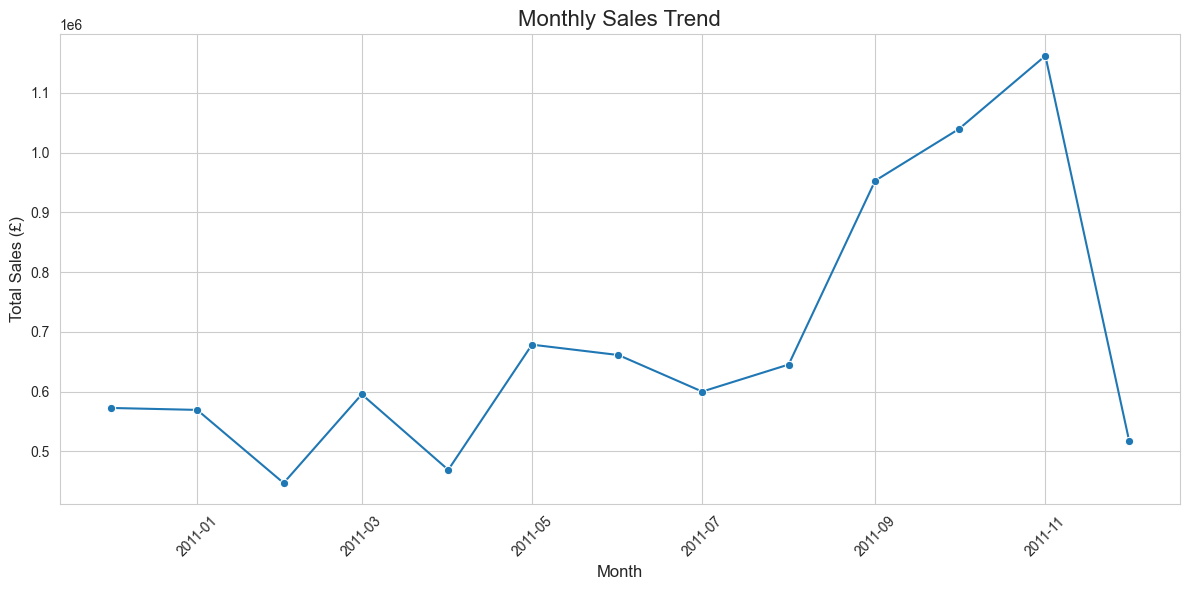

In [8]:
# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

# Group by InvoiceYearMonth and sum TotalPrice to get monthly sales
monthly_sales = df.groupby('InvoiceYearMonth')['TotalPrice'].sum().reset_index()
# Convert 'InvoiceYearMonth' back to datetime objects for proper plotting
monthly_sales['InvoiceYearMonth'] = monthly_sales['InvoiceYearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6)) # Set the size of the plot
sns.lineplot(data=monthly_sales, x='InvoiceYearMonth', y='TotalPrice', marker='o') # Create a line plot
plt.title('Monthly Sales Trend', fontsize=16) # Add a title
plt.xlabel('Month', fontsize=12) # Add x-axis label
plt.ylabel('Total Sales (£)', fontsize=12) # Add y-axis label
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.grid(True) # Show grid for better readability
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show() # Display the plot

C:\Users\91903\AppData\Local\Temp\ipykernel_11332\2628206613.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='InvoiceDayOfWeek', y='TotalPrice', palette='viridis') # Create a bar plot


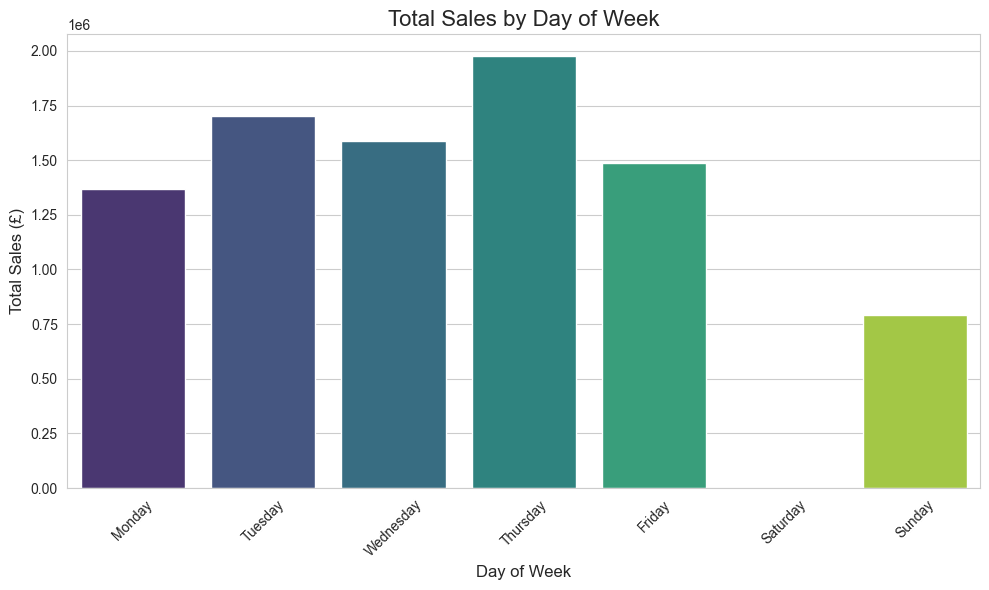

In [9]:
# --- Sales by Day of Week ---

# Define the order of days of the week for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by InvoiceDayOfWeek and sum TotalPrice
sales_by_day = df.groupby('InvoiceDayOfWeek')['TotalPrice'].sum().reindex(day_order).reset_index()

plt.figure(figsize=(10, 6)) # Set the size of the plot
sns.barplot(data=sales_by_day, x='InvoiceDayOfWeek', y='TotalPrice', palette='viridis') # Create a bar plot
plt.title('Total Sales by Day of Week', fontsize=16) # Add a title
plt.xlabel('Day of Week', fontsize=12) # Add x-axis label
plt.ylabel('Total Sales (£)', fontsize=12) # Add y-axis label
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show() # Display the plot

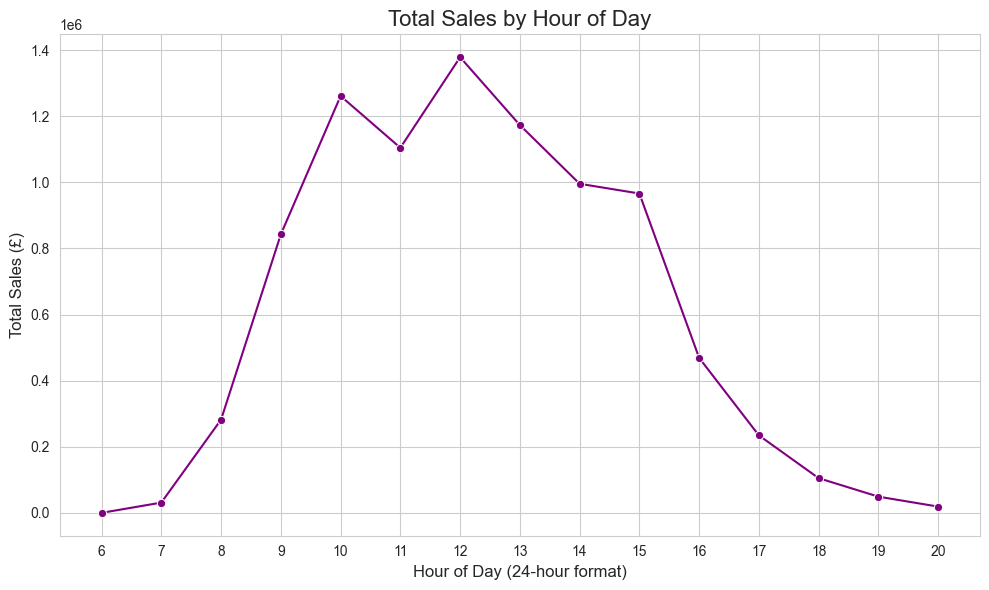

In [10]:
# --- Sales by Hour of Day ---

# Group by InvoiceHour and sum TotalPrice
sales_by_hour = df.groupby('InvoiceHour')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10, 6)) # Set the size of the plot
sns.lineplot(data=sales_by_hour, x='InvoiceHour', y='TotalPrice', marker='o', color='purple') # Line plot for hourly trend
plt.title('Total Sales by Hour of Day', fontsize=16) # Add a title
plt.xlabel('Hour of Day (24-hour format)', fontsize=12) # Add x-axis label
plt.ylabel('Total Sales (£)', fontsize=12) # Add y-axis label
plt.xticks(range(6, 21)) # Set x-ticks to focus on common business hours (e.g., 6 AM to 8 PM)
plt.grid(True) # Show grid
plt.tight_layout() # Adjust plot
plt.show() # Display the plot

C:\Users\91903\AppData\Local\Temp\ipykernel_11332\537849065.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalPrice', y='Description', palette='coolwarm') # Create a horizontal bar plot


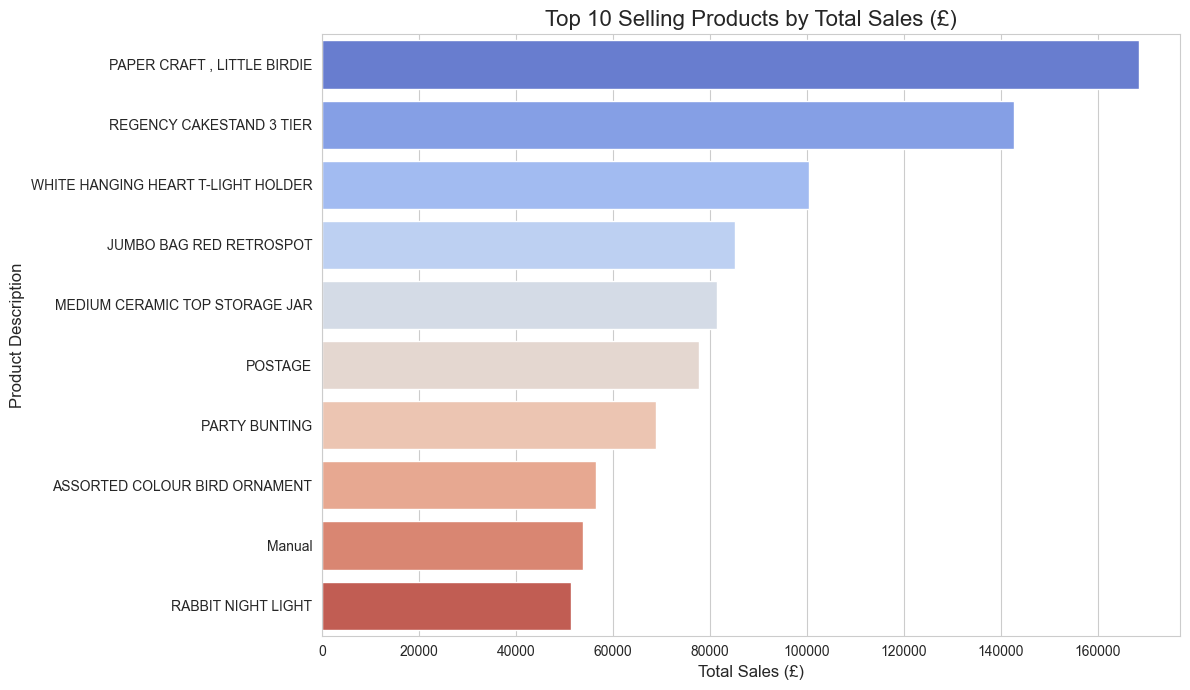


Top 10 Selling Products:
                          Description  TotalPrice
0         PAPER CRAFT , LITTLE BIRDIE   168469.60
1            REGENCY CAKESTAND 3 TIER   142592.95
2  WHITE HANGING HEART T-LIGHT HOLDER   100448.15
3             JUMBO BAG RED RETROSPOT    85220.78
4      MEDIUM CERAMIC TOP STORAGE JAR    81416.73
5                             POSTAGE    77803.96
6                       PARTY BUNTING    68844.33
7       ASSORTED COLOUR BIRD ORNAMENT    56580.34
8                              Manual    53779.93
9                  RABBIT NIGHT LIGHT    51346.20


In [11]:
# --- Top-Selling Products ---

# Group by Description (product name) and sum TotalPrice, then sort in descending order
top_products = df.groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7)) # Set the size of the plot
sns.barplot(data=top_products, x='TotalPrice', y='Description', palette='coolwarm') # Create a horizontal bar plot
plt.title('Top 10 Selling Products by Total Sales (£)', fontsize=16) # Add a title
plt.xlabel('Total Sales (£)', fontsize=12) # Add x-axis label
plt.ylabel('Product Description', fontsize=12) # Add y-axis label
plt.tight_layout() # Adjust plot
plt.show() # Display the plot

print("\nTop 10 Selling Products:")
print(top_products)

C:\Users\91903\AppData\Local\Temp\ipykernel_11332\1215353705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='TotalPrice', y='CustomerID', palette='magma') # Create a horizontal bar plot


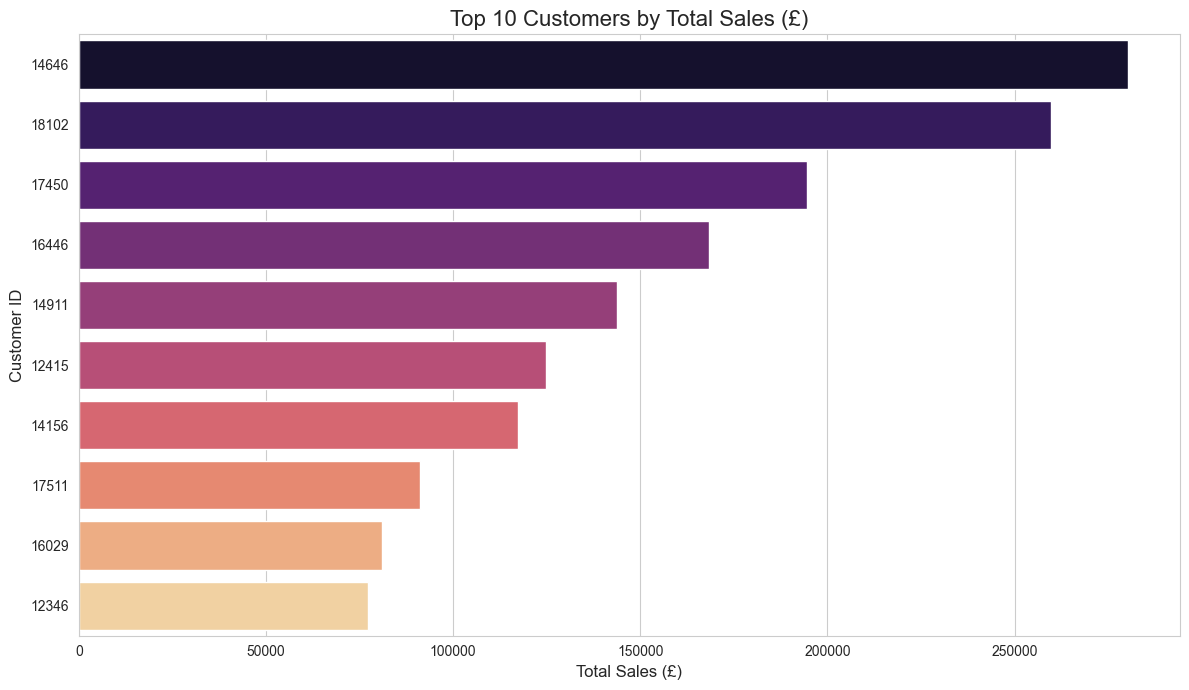


Top 10 Customers:
  CustomerID  TotalPrice
0      14646   280206.02
1      18102   259657.30
2      17450   194550.79
3      16446   168472.50
4      14911   143825.06
5      12415   124914.53
6      14156   117379.63
7      17511    91062.38
8      16029    81024.84
9      12346    77183.60


In [12]:
# --- Top Customers ---

# Group by CustomerID and sum TotalPrice, then sort in descending order
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7)) # Set the size of the plot
# Convert CustomerID to string for plotting if they are large numbers, for better x-axis readability
top_customers['CustomerID'] = top_customers['CustomerID'].astype(str)
sns.barplot(data=top_customers, x='TotalPrice', y='CustomerID', palette='magma') # Create a horizontal bar plot
plt.title('Top 10 Customers by Total Sales (£)', fontsize=16) # Add a title
plt.xlabel('Total Sales (£)', fontsize=12) # Add x-axis label
plt.ylabel('Customer ID', fontsize=12) # Add y-axis label
plt.tight_layout() # Adjust plot
plt.show() # Display the plot

print("\nTop 10 Customers:")
print(top_customers)

C:\Users\91903\AppData\Local\Temp\ipykernel_11332\1364967684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_country, x='TotalPrice', y='Country', palette='crest') # Create a horizontal bar plot


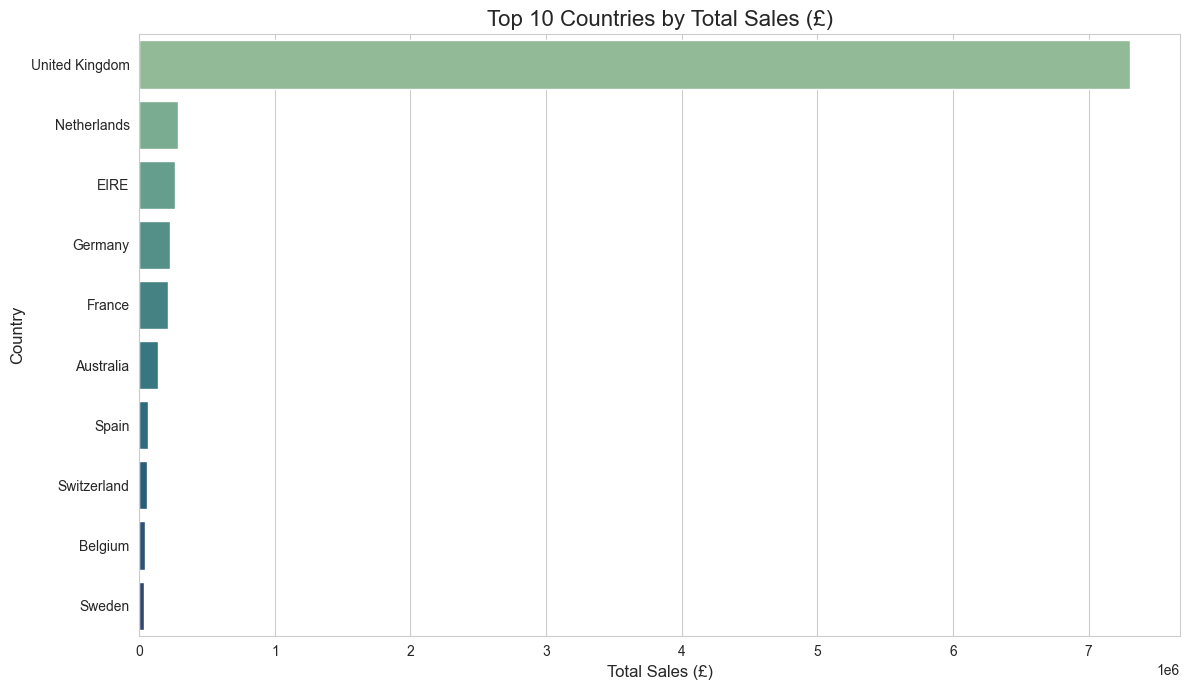


Top 10 Countries by Sales:
          Country   TotalPrice
0  United Kingdom  7308391.554
1     Netherlands   285446.340
2            EIRE   265545.900
3         Germany   228867.140
4          France   209024.050
5       Australia   138521.310
6           Spain    61577.110
7     Switzerland    56443.950
8         Belgium    41196.340
9          Sweden    38378.330


In [13]:
# --- Sales by Country ---

# Group by Country and sum TotalPrice, then sort in descending order
sales_by_country = df.groupby('Country')['TotalPrice'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7)) # Set the size of the plot
sns.barplot(data=sales_by_country, x='TotalPrice', y='Country', palette='crest') # Create a horizontal bar plot
plt.title('Top 10 Countries by Total Sales (£)', fontsize=16) # Add a title
plt.xlabel('Total Sales (£)', fontsize=12) # Add x-axis label
plt.ylabel('Country', fontsize=12) # Add y-axis label
plt.tight_layout() # Adjust plot
plt.show() # Display the plot

print("\nTop 10 Countries by Sales:")
print(sales_by_country)

In [14]:
# Export the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_ecommerce_data.csv', index=False)
print("\nCleaned data exported to 'cleaned_ecommerce_data.csv'")


Cleaned data exported to 'cleaned_ecommerce_data.csv'
